# 第一题
a) 请根据“表 1”（字段：入院首次影像检查流水号，发病到首次影像
检查时间间隔），“表 2”（字段：各时间点流水号及对应的 HM_volume），
判断患者 sub001 至 sub100 发病后 48 小时内是否发生血肿扩张事件。
结果填写规范：1 是 0 否，填写位置：“表 4”C 字段（是否发生血肿扩
张）。
如发生血肿扩张事件，请同时记录血肿扩张发生时间。
结果填写规范：如 10.33 小时，填写位置：“表 4”D 字段（血肿扩张时
间）。
⚫ 是否发生血肿扩张可根据血肿体积前后变化，具体定义为：后续检查
比首次检查绝对体积增加≥6 mL 或相对体积增加≥33%。
注：可通过流水号至“附表 1-检索表格-流水号 vs 时间”中查询相应影
像检查时间点，结合发病到首次影像时间间隔和后续影像检查时间间隔，
判断当前影像检查是否在发病 48 小时内。

b) 请以是否发生血肿扩张事件为目标变量，基于“表 1” 前 100 例患者
（sub001 至 sub100）的个人史，疾病史，发病及治疗相关特征（字段 E
至 W）、“表 2”中其影像检查结果（字段 C 至 X）及“表 3”其影像检
查结果（字段 C 至 AG，注：只可包含对应患者首次影像检查记录）等变
量，构建模型预测所有患者（sub001 至 sub160）发生血肿扩张的概率。
注：该问只可纳入患者首次影像检查信息。
结果填写规范：记录预测事件发生概率（取值范围 0-1，小数点后保留 4
位数）；填写位置：“表 4”E 字段（血肿扩张预测概率）。

In [92]:
import PIL

print(PIL.__version__)

10.0.1


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
data = pd.read_excel('../data/temp1.xlsx')
data.head()

,id,年龄,性别,入院首次影像检查流水号,HM_volume,随访1流水号,HM_volume.1,随访2流水号,HM_volume.2,随访3流水号,...,吸烟史,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,90天mRS
0,sub001,43,女,20161212002136,69714,2.016121e+13,74902.0,2.016122e+13,70952.0,2.016122e+13,...,0,0,0,1,1,1,1,1,1,4.0
1,sub002,58,男,20160406002131,47500,2.016041e+13,52271.0,2.016041e+13,47748.0,2.016043e+13,...,0,0,0,1,1,1,0,1,1,0.0
2,sub003,78,男,20160413000006,86396,2.016041e+13,106042.0,2.016041e+13,103263.0,NaN,...,0,0,0,1,1,1,1,1,1,5.0
3,sub004,70,男,20161215001667,45498,2.016122e+13,39877.0,2.016122e+13,16622.0,2.016123e+13,...,0,0,0,1,1,1,0,0,0,4.0
4,sub005,51,男,20161222000978,14832,2.016122e+13,24472.0,2.016123e+13,25477.0,NaN,...,0,0,0,1,1,0,0,1,1,3.0


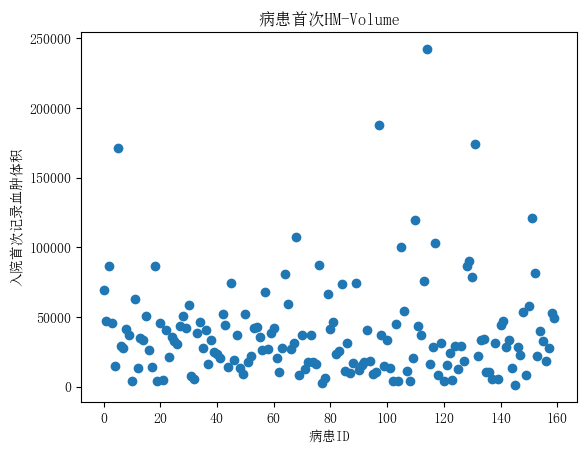

In [95]:
plt.rcParams['font.family'] = 'SimSun'

plt.scatter([i for i in range(len(data))], data['HM_volume'], marker='o')

fig_title = '病患首次HM-Volume'
plt.xlabel('病患ID')
plt.ylabel('入院首次记录血肿体积')
plt.title(fig_title)

plt.savefig(f'{fig_title}.png', dpi=300)
plt.show()

In [208]:
# 提取流水号

# print(first_check_flow_number)
# print(first_check_flow_number_100)

table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')
table3 = pd.read_excel('../data/附表1-检索表格-流水号vs时间.xlsx')

table = pd.merge(table1, table2, on='ID')

# 发病到首次检查时间间隔
onset_time_intervals = table['发病到首次影像检查时间间隔']

first_check_flow_number = table['入院首次影像检查流水号']  #全部

onset_time_intervals

0      2.5
1      3.0
2      2.0
3      1.0
4      5.0
      ... 
155    5.5
156    0.5
157    2.8
158    3.0
159    4.0
Name: 发病到首次影像检查时间间隔, Length: 160, dtype: float64

In [209]:
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
import math

# 数据清洗，将表三的随访2由float=>int
print(len(table3))
# table3['随访2流水号'] = table3['随访2流水号'].apply(lambda x: int(x) if not pd.isna(x) else x)
table3['随访2流水号'] = table3['随访2流水号'].apply(pd.to_numeric, errors='coerce').astype('Int64')
table3['随访3流水号'] = table3['随访3流水号'].apply(pd.to_numeric, errors='coerce').astype('Int64')
table3['随访4流水号'] = table3['随访4流水号'].apply(pd.to_numeric, errors='coerce').astype('Int64')
table3['随访5流水号'] = table3['随访5流水号'].apply(pd.to_numeric, errors='coerce').astype('Int64')
table3['随访6流水号'] = table3['随访6流水号'].apply(pd.to_numeric, errors='coerce').astype('Int64')
table3['随访2流水号'][0].__class__

160


numpy.int64

In [211]:
print(table3['随访3流水号'][0].__class__)

<class 'numpy.int64'>


In [212]:
# 生成映射关系
time_dict = dict(zip(table3['入院首次检查流水号'], table3['入院首次检查时间点']))
time_dict1 = dict(zip(table3['随访1流水号'], table3['随访1时间点']))
time_dict2 = dict(zip(table3['随访2流水号'], table3['随访2时间点']))
time_dict3 = dict(zip(table3['随访3流水号'], table3['随访3时间点']))
time_dict4 = dict(zip(table3['随访4流水号'], table3['随访4时间点']))
time_dict5 = dict(zip(table3['随访5流水号'], table3['随访5时间点']))
time_dict6 = dict(zip(table3['随访6流水号'], table3['随访6时间点']))


In [213]:
# table = table.iloc[:,:-1]
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:

from datetime import datetime

# 找到发病时间间隔
first_check_time = table['首次检查流水号'].map(time_dict)
Follow_up_1 = table['随访1流水号'].map(time_dict1)
Follow_up_2 = table['随访2流水号'].map(time_dict2)
Follow_up_3 = table['随访3流水号'].map(time_dict3)
Follow_up_4 = table['随访4流水号'].map(time_dict4)
Follow_up_5 = table['随访5流水号'].map(time_dict5)
Follow_up_6 = table['随访6流水号'].map(time_dict6)

# 计算发病时间
onset_time = []

# 使用迭代计算每个时间戳的时间差并存储结果
for timestamp, onset_time_interval in zip(first_check_time, onset_time_intervals):
    timestamp_dt = datetime.strptime(str(timestamp), "%Y-%m-%d %H:%M:%S")  # 将时间戳转换为 datetime 对象
    time_difference = pd.Timedelta(hours=onset_time_interval)  # 将小时转换为 Timedelta 对象
    result_timestamp = timestamp_dt - time_difference
    onset_time.append(result_timestamp)

# 打印结果或进行其他操作
onset_time

[datetime.datetime(2016, 12, 12, 21, 2, 54),
 datetime.datetime(2016, 4, 6, 18, 21, 3),
 datetime.datetime(2016, 4, 12, 23, 18, 17),
 datetime.datetime(2016, 12, 15, 21, 53, 41),
 datetime.datetime(2016, 12, 22, 8, 18, 48),
 datetime.datetime(2016, 11, 9, 11, 42, 16),
 datetime.datetime(2016, 12, 7, 14, 4, 50),
 datetime.datetime(2016, 12, 19, 6, 6, 49),
 datetime.datetime(2016, 10, 31, 18, 26, 9),
 datetime.datetime(2016, 10, 12, 18, 51, 14),
 datetime.datetime(2016, 2, 9, 16, 9, 51),
 datetime.datetime(2016, 10, 31, 9, 48, 12),
 datetime.datetime(2016, 11, 24, 6, 49, 48),
 datetime.datetime(2016, 5, 13, 15, 28, 42),
 datetime.datetime(2016, 10, 13, 9, 22, 6),
 datetime.datetime(2016, 11, 30, 2, 18, 31),
 datetime.datetime(2016, 5, 10, 19, 51, 42),
 datetime.datetime(2016, 6, 2, 18, 23, 56),
 datetime.datetime(2016, 1, 17, 1, 22, 25),
 datetime.datetime(2016, 7, 23, 2, 21, 45),
 datetime.datetime(2016, 3, 17, 10, 29, 53),
 datetime.datetime(2016, 8, 3, 13, 8, 31),
 datetime.datetime(2

In [218]:
table['首次检查时间'] = table['首次检查流水号'].map(time_dict)
table['第一次随访时间'] = table['随访1流水号'].map(time_dict1)
table['第二次随访时间'] = table['随访2流水号'].map(time_dict2)
table['第三次随访时间'] = table['随访3流水号'].map(time_dict3)
table['第四次随访时间'] = table['随访4流水号'].map(time_dict4)
table['第五次随访时间'] = table['随访5流水号'].map(time_dict5)
table['第六次随访时间'] = table['随访6流水号'].map(time_dict6)

onset_time = pd.Series(onset_time)
# print(onset_time)
onset_time = pd.to_datetime(onset_time)
# 创建一个时间差对象，表示48小时
two_days = pd.to_timedelta(2, unit='D')
onset_time_plus_48_hours = onset_time + two_days

table['发病时间'] = onset_time
table['48小时后'] = onset_time_plus_48_hours
table['首次检查时间差'] = (table['首次检查时间'] - onset_time).dt.total_seconds() / 3600
table['第一次随访时间差'] = (table['第一次随访时间'] - onset_time).dt.total_seconds() / 3600
table['第二次随访时间差'] = (table['第二次随访时间'] - onset_time).dt.total_seconds() / 3600
table['第三次随访时间差'] = (table['第三次随访时间'] - onset_time).dt.total_seconds() / 3600
table['第四次随访时间差'] = (table['第四次随访时间'] - onset_time).dt.total_seconds() / 3600
table['第五次随访时间差'] = (table['第五次随访时间'] - onset_time).dt.total_seconds() / 3600
table['第六次随访时间差'] = (table['第六次随访时间'] - onset_time).dt.total_seconds() / 3600


# 打印结果
# print(onset_time_plus_48_hours.__class__)

# table.iloc[:,:-9]

In [221]:
# file_name = '随访6次后时间Temp.xlsx'
# table.to_excel(file_name,index=False)
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,第六次随访时间,发病时间,48小时后,首次检查时间差,第一次随访时间差,第二次随访时间差,第三次随访时间差,第四次随访时间差,第五次随访时间差,第六次随访时间差
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaT,2016-12-12 21:02:54,2016-12-14 21:02:54,2.5,8.268333,132.108333,259.737500,425.538333,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaT,2016-04-06 18:21:03,2016-04-08 18:21:03,3.0,14.923333,69.221944,448.016389,1119.191944,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaT,2016-04-12 23:18:17,2016-04-14 23:18:17,2.0,9.522500,39.595833,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaT,2016-12-15 21:53:41,2016-12-17 21:53:41,1.0,16.974167,83.845278,227.501111,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaT,2016-12-22 08:18:48,2016-12-24 08:18:48,5.0,26.467500,97.943056,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaT,2020-03-06 09:03:56,2020-03-08 09:03:56,5.5,24.881944,125.615833,293.317222,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaT,2020-10-09 19:05:00,2020-10-11 19:05:00,0.5,1.366667,7.116667,20.066667,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaT,2020-04-10 14:52:00,2020-04-12 14:52:00,2.8,18.383333,71.300000,308.650000,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaT,2020-02-18 12:29:00,2020-02-20 12:29:00,3.0,26.533333,NaN,NaN,NaN,NaN,NaN


## 判断是否血肿扩张

In [284]:
# 3. 血肿扩张的判断
theta = 0.33
result = pd.DataFrame()
result['ID'] = table['ID'].unique()
result['是否发生血肿扩张'] = 0
result['血肿扩张时间'] = None
# print(result['ID'])

for patient in result['ID']:
    initial_hm_volume = table.loc[(table['ID'] == patient) & (table['首次检查时间差'] <= 48), 'HM_volume'].max()
    hm_volume_after1 = table.loc[(table['ID'] == patient) & (table['第一次随访时间差'] <= 48), 'HM_volume.1'].max()
    hm_volume_after2 = table.loc[(table['ID'] == patient) & (table['第二次随访时间差'] <= 48), 'HM_volume.2'].max()
    hm_volume_after3 = table.loc[(table['ID'] == patient) & (table['第三次随访时间差'] <= 48), 'HM_volume.3'].max()
    time1 = table.loc[(table['ID'] == patient) & (table['第一次随访时间差'] <= 48), '第一次随访时间差'].max()
    if time1 <= 48 and (hm_volume_after1 - initial_hm_volume) / initial_hm_volume >= theta:  #第一次在48小时内的 看第二次随访
        result.loc[result['ID'] == patient, '是否发生血肿扩张'] = 1
        expansion_time = table.loc[
            (table['ID'] == patient) & (table['HM_volume.1'] == hm_volume_after1), '第一次随访时间'].max()
        # print(expansion_time)
        result.loc[result['ID'] == patient, '血肿扩张时间'] = expansion_time
        time2 = table.loc[(table['ID'] == patient) & (table['第二次随访时间差'] <= 48), '第二次随访时间差'].max()
        if time2 <= 48 and (hm_volume_after1 - initial_hm_volume) / initial_hm_volume >= theta:  #第二次随访在48小时内的，看第三四随访
            result.loc[result['ID'] == patient, '是否发生血肿扩张'] = 1
            expansion_time = table.loc[
                (table['ID'] == patient) & (table['HM_volume.2'] == hm_volume_after2), '第二次随访时间'].max()
            # print(expansion_time)
            result.loc[result['ID'] == patient, '血肿扩张时间'] = expansion_time
            time3 = table.loc[(table['ID'] == patient) & (table['第三次随访时间差'] <= 48), '第三次随访时间差'].max()
            if time3 <= 48 and (
                    hm_volume_after1 - initial_hm_volume) / initial_hm_volume >= theta:  #第二次随访在48小时内的，看第三四随访
                result.loc[result['ID'] == patient, '是否发生血肿扩张'] = 1
                expansion_time = table.loc[
                    (table['ID'] == patient) & (table['HM_volume.3'] == hm_volume_after3), '第三次随访时间'].max()
                # print(expansion_time)
                result.loc[result['ID'] == patient, '血肿扩张时间'] = expansion_time





In [285]:
file_name = 'result.xlsx'
result.to_excel(file_name, index=False)
result

,ID,是否发生血肿扩张,血肿扩张时间
0,sub001,0,None
1,sub002,0,None
2,sub003,0,None
3,sub004,0,None
4,sub005,1,2016-12-23 10:46:51
...,...,...,...
155,sub156,0,None
156,sub157,1,2020-10-10 15:09:00
157,sub158,0,None
158,sub159,1,2020-02-19 15:01:00


## XGBoost 回归

In [329]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,48小时后,首次检查时间差,第一次随访时间差,第二次随访时间差,第三次随访时间差,第四次随访时间差,第五次随访时间差,第六次随访时间差,是否发生血肿扩张,血肿扩张时间
0,sub001,4.0,训练,20161212002136,43,0,0,0,0,0,...,2016-12-14 21:02:54,2.5,8.268333,132.108333,259.737500,425.538333,NaN,NaN,0,None
1,sub002,0.0,训练,20160406002131,58,1,0,1,0,0,...,2016-04-08 18:21:03,3.0,14.923333,69.221944,448.016389,1119.191944,NaN,NaN,0,None
2,sub003,5.0,训练,20160413000006,78,1,0,1,0,0,...,2016-04-14 23:18:17,2.0,9.522500,39.595833,NaN,NaN,NaN,NaN,0,None
3,sub004,4.0,训练,20161215001667,70,1,2,1,1,0,...,2016-12-17 21:53:41,1.0,16.974167,83.845278,227.501111,NaN,NaN,NaN,0,None
4,sub005,3.0,训练,20161222000978,51,1,0,0,0,0,...,2016-12-24 08:18:48,5.0,26.467500,97.943056,NaN,NaN,NaN,NaN,1,2016-12-23 10:46:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,0,0,1,0,0,...,2020-03-08 09:03:56,5.5,24.881944,125.615833,293.317222,NaN,NaN,NaN,0,None
156,sub157,NaN,测试2,20201009003102,52,1,2,1,1,0,...,2020-10-11 19:05:00,0.5,1.366667,7.116667,20.066667,NaN,NaN,NaN,1,2020-10-10 15:09:00
157,sub158,NaN,测试2,20200410001952,57,1,0,1,0,0,...,2020-04-12 14:52:00,2.8,18.383333,71.300000,308.650000,NaN,NaN,NaN,0,None
158,sub159,NaN,测试2,20200218000582,47,1,0,1,0,0,...,2020-02-20 12:29:00,3.0,26.533333,NaN,NaN,NaN,NaN,NaN,1,2020-02-19 15:01:00


In [330]:
# table = pd.merge(table,result,on='ID')
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,48小时后,首次检查时间差,第一次随访时间差,第二次随访时间差,第三次随访时间差,第四次随访时间差,第五次随访时间差,第六次随访时间差,是否发生血肿扩张,血肿扩张时间
0,sub001,4.0,训练,20161212002136,43,0,0,0,0,0,...,2016-12-14 21:02:54,2.5,8.268333,132.108333,259.737500,425.538333,NaN,NaN,0,None
1,sub002,0.0,训练,20160406002131,58,1,0,1,0,0,...,2016-04-08 18:21:03,3.0,14.923333,69.221944,448.016389,1119.191944,NaN,NaN,0,None
2,sub003,5.0,训练,20160413000006,78,1,0,1,0,0,...,2016-04-14 23:18:17,2.0,9.522500,39.595833,NaN,NaN,NaN,NaN,0,None
3,sub004,4.0,训练,20161215001667,70,1,2,1,1,0,...,2016-12-17 21:53:41,1.0,16.974167,83.845278,227.501111,NaN,NaN,NaN,0,None
4,sub005,3.0,训练,20161222000978,51,1,0,0,0,0,...,2016-12-24 08:18:48,5.0,26.467500,97.943056,NaN,NaN,NaN,NaN,1,2016-12-23 10:46:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,0,0,1,0,0,...,2020-03-08 09:03:56,5.5,24.881944,125.615833,293.317222,NaN,NaN,NaN,0,None
156,sub157,NaN,测试2,20201009003102,52,1,2,1,1,0,...,2020-10-11 19:05:00,0.5,1.366667,7.116667,20.066667,NaN,NaN,NaN,1,2020-10-10 15:09:00
157,sub158,NaN,测试2,20200410001952,57,1,0,1,0,0,...,2020-04-12 14:52:00,2.8,18.383333,71.300000,308.650000,NaN,NaN,NaN,0,None
158,sub159,NaN,测试2,20200218000582,47,1,0,1,0,0,...,2020-02-20 12:29:00,3.0,26.533333,NaN,NaN,NaN,NaN,NaN,1,2020-02-19 15:01:00


#### 相关性分析

In [331]:
# 数据清洗
# table['性别'] = table['性别'].map({'男': 1, '女': 0})
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,48小时后,首次检查时间差,第一次随访时间差,第二次随访时间差,第三次随访时间差,第四次随访时间差,第五次随访时间差,第六次随访时间差,是否发生血肿扩张,血肿扩张时间
0,sub001,4.0,训练,20161212002136,43,0,0,0,0,0,...,2016-12-14 21:02:54,2.5,8.268333,132.108333,259.737500,425.538333,NaN,NaN,0,None
1,sub002,0.0,训练,20160406002131,58,1,0,1,0,0,...,2016-04-08 18:21:03,3.0,14.923333,69.221944,448.016389,1119.191944,NaN,NaN,0,None
2,sub003,5.0,训练,20160413000006,78,1,0,1,0,0,...,2016-04-14 23:18:17,2.0,9.522500,39.595833,NaN,NaN,NaN,NaN,0,None
3,sub004,4.0,训练,20161215001667,70,1,2,1,1,0,...,2016-12-17 21:53:41,1.0,16.974167,83.845278,227.501111,NaN,NaN,NaN,0,None
4,sub005,3.0,训练,20161222000978,51,1,0,0,0,0,...,2016-12-24 08:18:48,5.0,26.467500,97.943056,NaN,NaN,NaN,NaN,1,2016-12-23 10:46:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,0,0,1,0,0,...,2020-03-08 09:03:56,5.5,24.881944,125.615833,293.317222,NaN,NaN,NaN,0,None
156,sub157,NaN,测试2,20201009003102,52,1,2,1,1,0,...,2020-10-11 19:05:00,0.5,1.366667,7.116667,20.066667,NaN,NaN,NaN,1,2020-10-10 15:09:00
157,sub158,NaN,测试2,20200410001952,57,1,0,1,0,0,...,2020-04-12 14:52:00,2.8,18.383333,71.300000,308.650000,NaN,NaN,NaN,0,None
158,sub159,NaN,测试2,20200218000582,47,1,0,1,0,0,...,2020-02-20 12:29:00,3.0,26.533333,NaN,NaN,NaN,NaN,NaN,1,2020-02-19 15:01:00


D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\wwx\AppData\Local\Temp\ipykernel_47560\2446255677.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('第一题相关性热力图', dmi=300)
C:\Users\wwx\AppData\Local\Temp\ipykernel_47560\2446255677.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('第一题相关性热力图', dmi=300)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


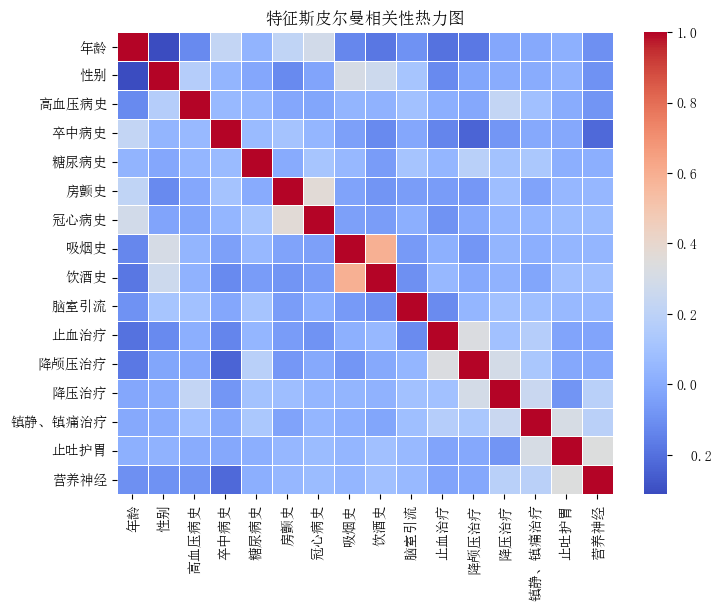

In [406]:

# 选择要分析的特征
features = ['年龄', '性别', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗',
            '镇静、镇痛治疗', '止吐护胃', '营养神经']

# 选择特征和目标变量
X = table[features]
y = table['是否发生血肿扩张']

# 计算特征之间的斯皮尔曼相关性矩阵
correlation_matrix = X.corr(method='spearman')

# 创建一个热力图，不显示相关性数值
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('特征斯皮尔曼相关性热力图')
plt.savefig('第一题相关性热力图', dmi=300)
plt.show()

In [408]:

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.625, test_size=0.375, random_state=0)

# print(len(X_train))
X_train

,年龄,性别,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,饮酒史,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
83,49,1,1,0,0,0,0,1,1,0,1,1,1,1,1,1
43,53,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1
71,91,0,1,0,0,1,1,0,0,0,0,0,1,1,1,1
10,80,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1
141,47,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,74,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1
103,42,1,1,0,0,0,0,1,1,0,0,1,1,0,1,1
67,40,1,1,0,0,0,0,0,1,0,1,1,1,1,1,1
117,85,1,1,0,0,0,1,0,0,0,1,1,1,0,1,1


In [409]:
model_0 = xgb.XGBClassifier(n_estimators=60, random_state=0)  # 设置迭代次数为500
model_0.fit(X_train, y_train)

# Predict on validation set
y_pred = model_0.predict(X_valid)
print(f'y_pred : {y_pred}')

# Calculate accuracy
accuracy_xgboost = accuracy_score(y_valid, y_pred)
print(f'accuracy : {accuracy_xgboost}')

y_pred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
accuracy : 0.8166666666666667


##### XGboost 可视化

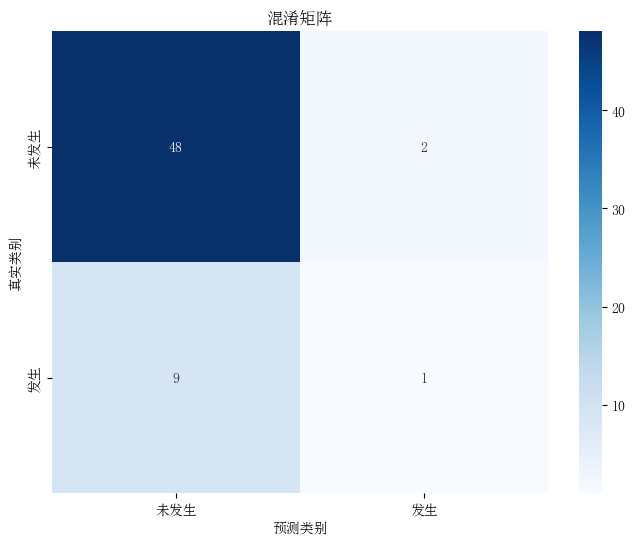

In [352]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 计算混淆矩阵
cm = confusion_matrix(y_valid, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['未发生', '发生'], yticklabels=['未发生', '发生'])
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.title('混淆矩阵')
plt.show()

C:\Users\wwx\AppData\Local\Temp\ipykernel_47560\2031930467.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('XGBoost_ROC.png',dmi=500)


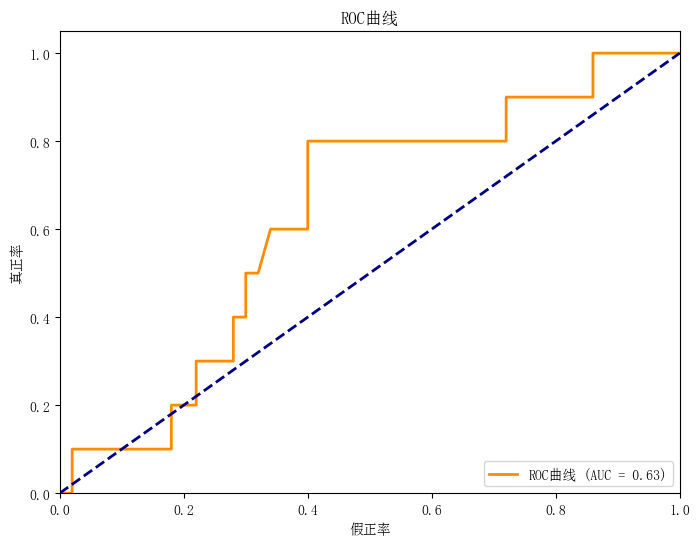

In [410]:
# 计算ROC曲线的假正率和真正率
fpr, tpr, _ = roc_curve(y_valid, model_0.predict_proba(X_valid)[:, 1])

# 计算AUC
roc_auc = roc_auc_score(y_valid, model_0.predict_proba(X_valid)[:, 1])

# 可视化ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc='lower right')
plt.savefig('XGBoost_ROC.png',dmi=500)
plt.show()


## LogisticRegression

In [354]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a logistic regression model
model_1 = LogisticRegression(max_iter=500)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [355]:
# Predict on validation set
y_pred = model_1.predict(X_valid)
print(f'y_pred : {y_pred}')
# Calculate accuracy
accuracy_logisticRegression = accuracy_score(y_valid, y_pred)
print(f'accuracy : {accuracy_logisticRegression}')

y_pred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy : 0.8333333333333334


#### 可视化

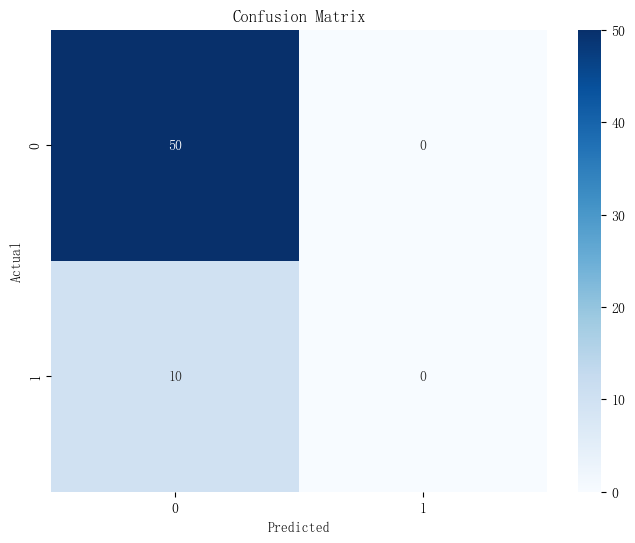

In [356]:
conf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\wwx\AppData\Local\Temp\ipykernel_47560\372793715.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('LogisticRegression_ROC.png',dmi=300)


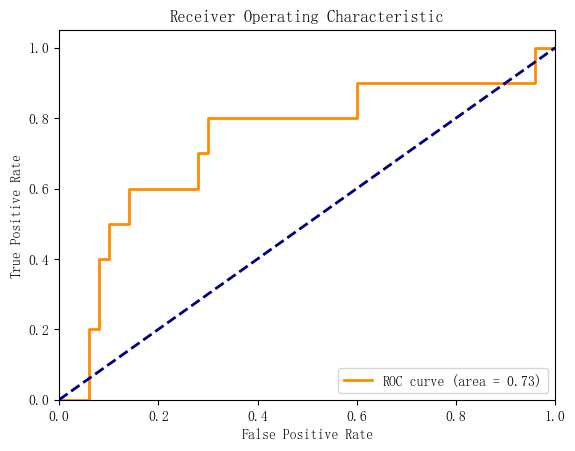

In [411]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_valid, model_1.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LogisticRegression_ROC.png',dmi=300)
plt.show()

In [358]:
from sklearn.ensemble import RandomForestClassifier


## 随机森林

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
0.8


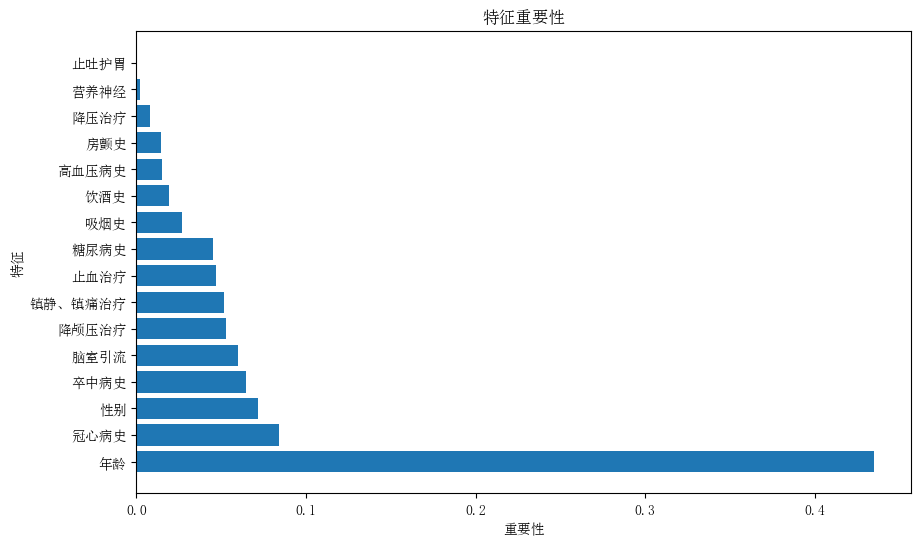

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [413]:

model_2 = RandomForestClassifier(n_estimators=10, random_state=0)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_valid)
print(y_pred)

accuracy = accuracy_score(y_valid, y_pred)
print(accuracy)

# 获取特征重要性分数
feature_importances = model_2.feature_importances_

# 创建一个包含特征名和对应重要性分数的DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# 按重要性分数降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('重要性')
plt.ylabel('特征')
plt.title('特征重要性')
plt.savefig('特征重要性')
plt.show()
print(y_pred)

C:\Users\wwx\AppData\Local\Temp\ipykernel_47560\238679506.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('随机森林.png',dmi=300)


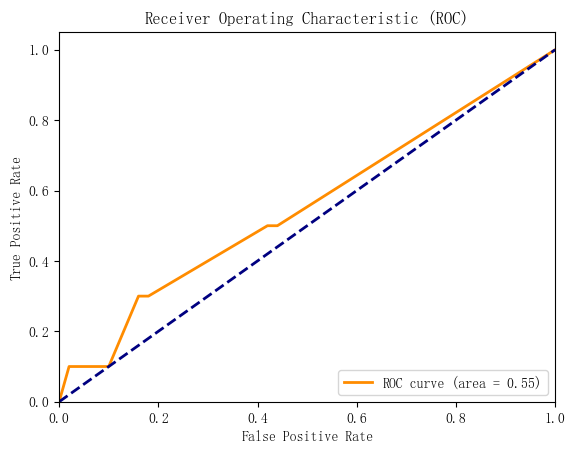

In [416]:

fpr, tpr, thresholds = roc_curve(y_valid, model_2.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.savefig('随机森林.png',dmi=300)
plt.show()

In [417]:
# 做预测
y_pred_0 = model_0.predict(X)
y_pred_1 = model_1.predict(X)
print(y_pred_0)
print(y_pred_1)


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [424]:
# 计算概率
y_probabilities = model_0.predict_proba(X)
y_pred_prob = y_probabilities[:, 1]
print(y_pred_prob)
#设置阈值
# threshold = 0.6
# y_pred_all = 0.5 * (1 + ((y_pred_prob - threshold) / (1 - threshold)))
# # y_pred_all = y_pred_all.round(4)
# print(y_pred_all)

[0.08431341 0.01698908 0.64458734 0.01604341 0.3335098  0.02917906
 0.00591079 0.04248579 0.07392649 0.01304191 0.18554793 0.01561444
 0.15356985 0.01168613 0.0143789  0.08425772 0.15356985 0.01880713
 0.01198528 0.31433794 0.0756026  0.03264473 0.04427742 0.05874443
 0.07950483 0.0741299  0.39710286 0.38007775 0.29965436 0.02183901
 0.23064306 0.18393283 0.81641793 0.07420783 0.0341375  0.50288326
 0.06140943 0.08282927 0.07950483 0.07950483 0.13024005 0.04586536
 0.03494103 0.0214228  0.16748044 0.02857079 0.08282927 0.29965436
 0.08577174 0.08431341 0.13703315 0.8984271  0.16469434 0.0756026
 0.2904283  0.0215708  0.01846025 0.05208074 0.01119865 0.7461971
 0.01875505 0.0323341  0.0856632  0.0422006  0.14813296 0.09255309
 0.05489423 0.09693665 0.0334646  0.52226347 0.09401602 0.20651618
 0.07420783 0.07950483 0.01951983 0.80404085 0.64689    0.09278559
 0.70675546 0.03639108 0.20543085 0.06831676 0.09981847 0.05111481
 0.08673043 0.02592195 0.02519962 0.16229835 0.01902677 0.086730

In [425]:
y_pred_prob_column = pd.Series(y_pred_prob,name='y_pred_prob')

predit_table = pd.concat([table,y_pred_prob_column],axis=1)
predit_table


,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,首次检查时间差,第一次随访时间差,第二次随访时间差,第三次随访时间差,第四次随访时间差,第五次随访时间差,第六次随访时间差,是否发生血肿扩张,血肿扩张时间,y_pred_prob
0,sub001,4.0,训练,20161212002136,43,0,0,0,0,0,...,2.5,8.268333,132.108333,259.737500,425.538333,NaN,NaN,0,None,0.084313
1,sub002,0.0,训练,20160406002131,58,1,0,1,0,0,...,3.0,14.923333,69.221944,448.016389,1119.191944,NaN,NaN,0,None,0.016989
2,sub003,5.0,训练,20160413000006,78,1,0,1,0,0,...,2.0,9.522500,39.595833,NaN,NaN,NaN,NaN,0,None,0.644587
3,sub004,4.0,训练,20161215001667,70,1,2,1,1,0,...,1.0,16.974167,83.845278,227.501111,NaN,NaN,NaN,0,None,0.016043
4,sub005,3.0,训练,20161222000978,51,1,0,0,0,0,...,5.0,26.467500,97.943056,NaN,NaN,NaN,NaN,1,2016-12-23 10:46:51,0.333510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,0,0,1,0,0,...,5.5,24.881944,125.615833,293.317222,NaN,NaN,NaN,0,None,0.077609
156,sub157,NaN,测试2,20201009003102,52,1,2,1,1,0,...,0.5,1.366667,7.116667,20.066667,NaN,NaN,NaN,1,2020-10-10 15:09:00,0.748507
157,sub158,NaN,测试2,20200410001952,57,1,0,1,0,0,...,2.8,18.383333,71.300000,308.650000,NaN,NaN,NaN,0,None,0.082829
158,sub159,NaN,测试2,20200218000582,47,1,0,1,0,0,...,3.0,26.533333,NaN,NaN,NaN,NaN,NaN,1,2020-02-19 15:01:00,0.307743


In [427]:
file_name = 'predicted_prob_expand.xlsx'
predit_table.to_excel(file_name,index=False)

# 第二题

2	血肿周围水肿的发生及进展建模，并探索治疗干预和水肿进展的关联关系。
a)	请根据“表2”前100个患者（sub001至sub100）的水肿体积（ED_volume）和重复检查时间点，构建一条全体患者水肿体积随时间进展曲线（x轴：发病至影像检查时间，y轴：水肿体积，y=f(x)），计算前100个患者（sub001至sub100）真实值和所拟合曲线之间存在的残差。
结果填写规范：记录残差，填写位置“表4”F字段（残差（全体））。
b)	请探索患者水肿体积随时间进展模式的个体差异，构建不同人群（分亚组：3-5个）的水肿体积随时间进展曲线，并计算前100个患者（sub001至sub100）真实值和曲线间的残差。
结果填写规范：记录残差，填写位置“表4”G字段（残差（亚组）），同时将所属亚组填写在H段（所属亚组）。
c)	请分析不同治疗方法（“表1”字段Q至W）对水肿体积进展模式的影响。
d)	请分析血肿体积、水肿体积及治疗方法（“表1”字段Q至W）三者之间的关系。